In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import math
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 500

In [2]:
g = '/media/rakshith/Seagate Expansion Drive/mraks/land sea ERA.nc'
f7 = netCDF4.Dataset(g)
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
f8 = netCDF4.Dataset(h)
v1 = f7['lsm'][0, :, :]


In [3]:
#Rainfall vs Pwat
X = np.linspace(1959, 2021, 63, dtype='int')
Months = ['June', 'July', 'August', 'September']

E1 = []
P1 = []
Pwat1 = []
year = [1959, 2002]
end = [1978, 2021]

for i in range(len(year)):
    a = (year[i] - 1959)*12
    b = (end[i]-1959+1)*12
    for j in range(a, b, 12):
        #for k in range(j, j+12):
        for k in range(j+5, j+9):
            sum1 = 0
            sum2 = 0
            sum3 = 0
            v8 = f8['mtpr'][k, :, :]
            v9 = f8['mer'][k, :, :]
            v10 = f8['tcwv'][k, :, :]
            sum1 = 86400*(-v9)
            sum2 = 86400*(v8)
            sum3 = v10
            x = np.multiply(v1, sum1)
            y = np.multiply(v1, sum2)
            z = np.multiply(v1, sum3)
            E1.append(np.average(x[np.nonzero(x)]))
            P1.append(np.average(y[np.nonzero(y)]))
            Pwat1.append(np.average(z[np.nonzero(z)]))

#Curve fitting
div = int((len(Pwat1))/2)
print(div)
x1, y1 = Pwat1[:div], P1[:div]
x2, y2 = Pwat1[div:], P1[div:]

80


In [4]:
dic1 = {Pwat1[i]: P1[i] for i in range(0, int(len(Pwat1)/2))}
dic2 = {Pwat1[i]: P1[i] for i in range(int(len(Pwat1)/2), len(Pwat1))}

In [5]:
import collections
dic1 = collections.OrderedDict(sorted(dic1.items()))
dic2 = collections.OrderedDict(sorted(dic2.items()))

In [6]:
a = np.array([*dic1]) # just the keys from the dictionary
b = np.array([*dic2])
#clusters = np.linspace(10, 54, 23) #For all months
clusters = np.linspace(34, 52, 10) #For two decades
digits1 = np.digitize(a, clusters) # bin the data based on the bins
digits2 = np.digitize(b, clusters)

res1 = dict()
res2 = dict()
for c in digits1:
    keys1 = a[digits1 == c] # grab all keys for this bin
    value1 = [dic1.get(k) for k in keys1] # values for these keys from the original dict
    res1[keys1.mean()] = np.average(value1)

for c in digits2:
    keys2 = b[digits2 == c]
    value2 = [dic2.get(k) for k in keys2]
    res2[keys2.mean()] = np.average(value2)

In [7]:
bins1 = np.linspace(35, 53, 10, dtype=int)
bins2 = np.linspace(37, 53, 9)

arr1 = np.linspace(1, 10, 10)
arr2 = np.linspace(2, 10, 9)
std1 = []
std2 = []
for i in arr1:
    keys1 = a[digits1 == i]
    value1 = [dic1.get(k) for k in keys1]
    std1.append(np.std(value1))
    
for i in arr2:
    keys2 = b[digits2 == i]
    value2 = [dic2.get(k) for k in keys2]
    std2.append(np.std(value2))

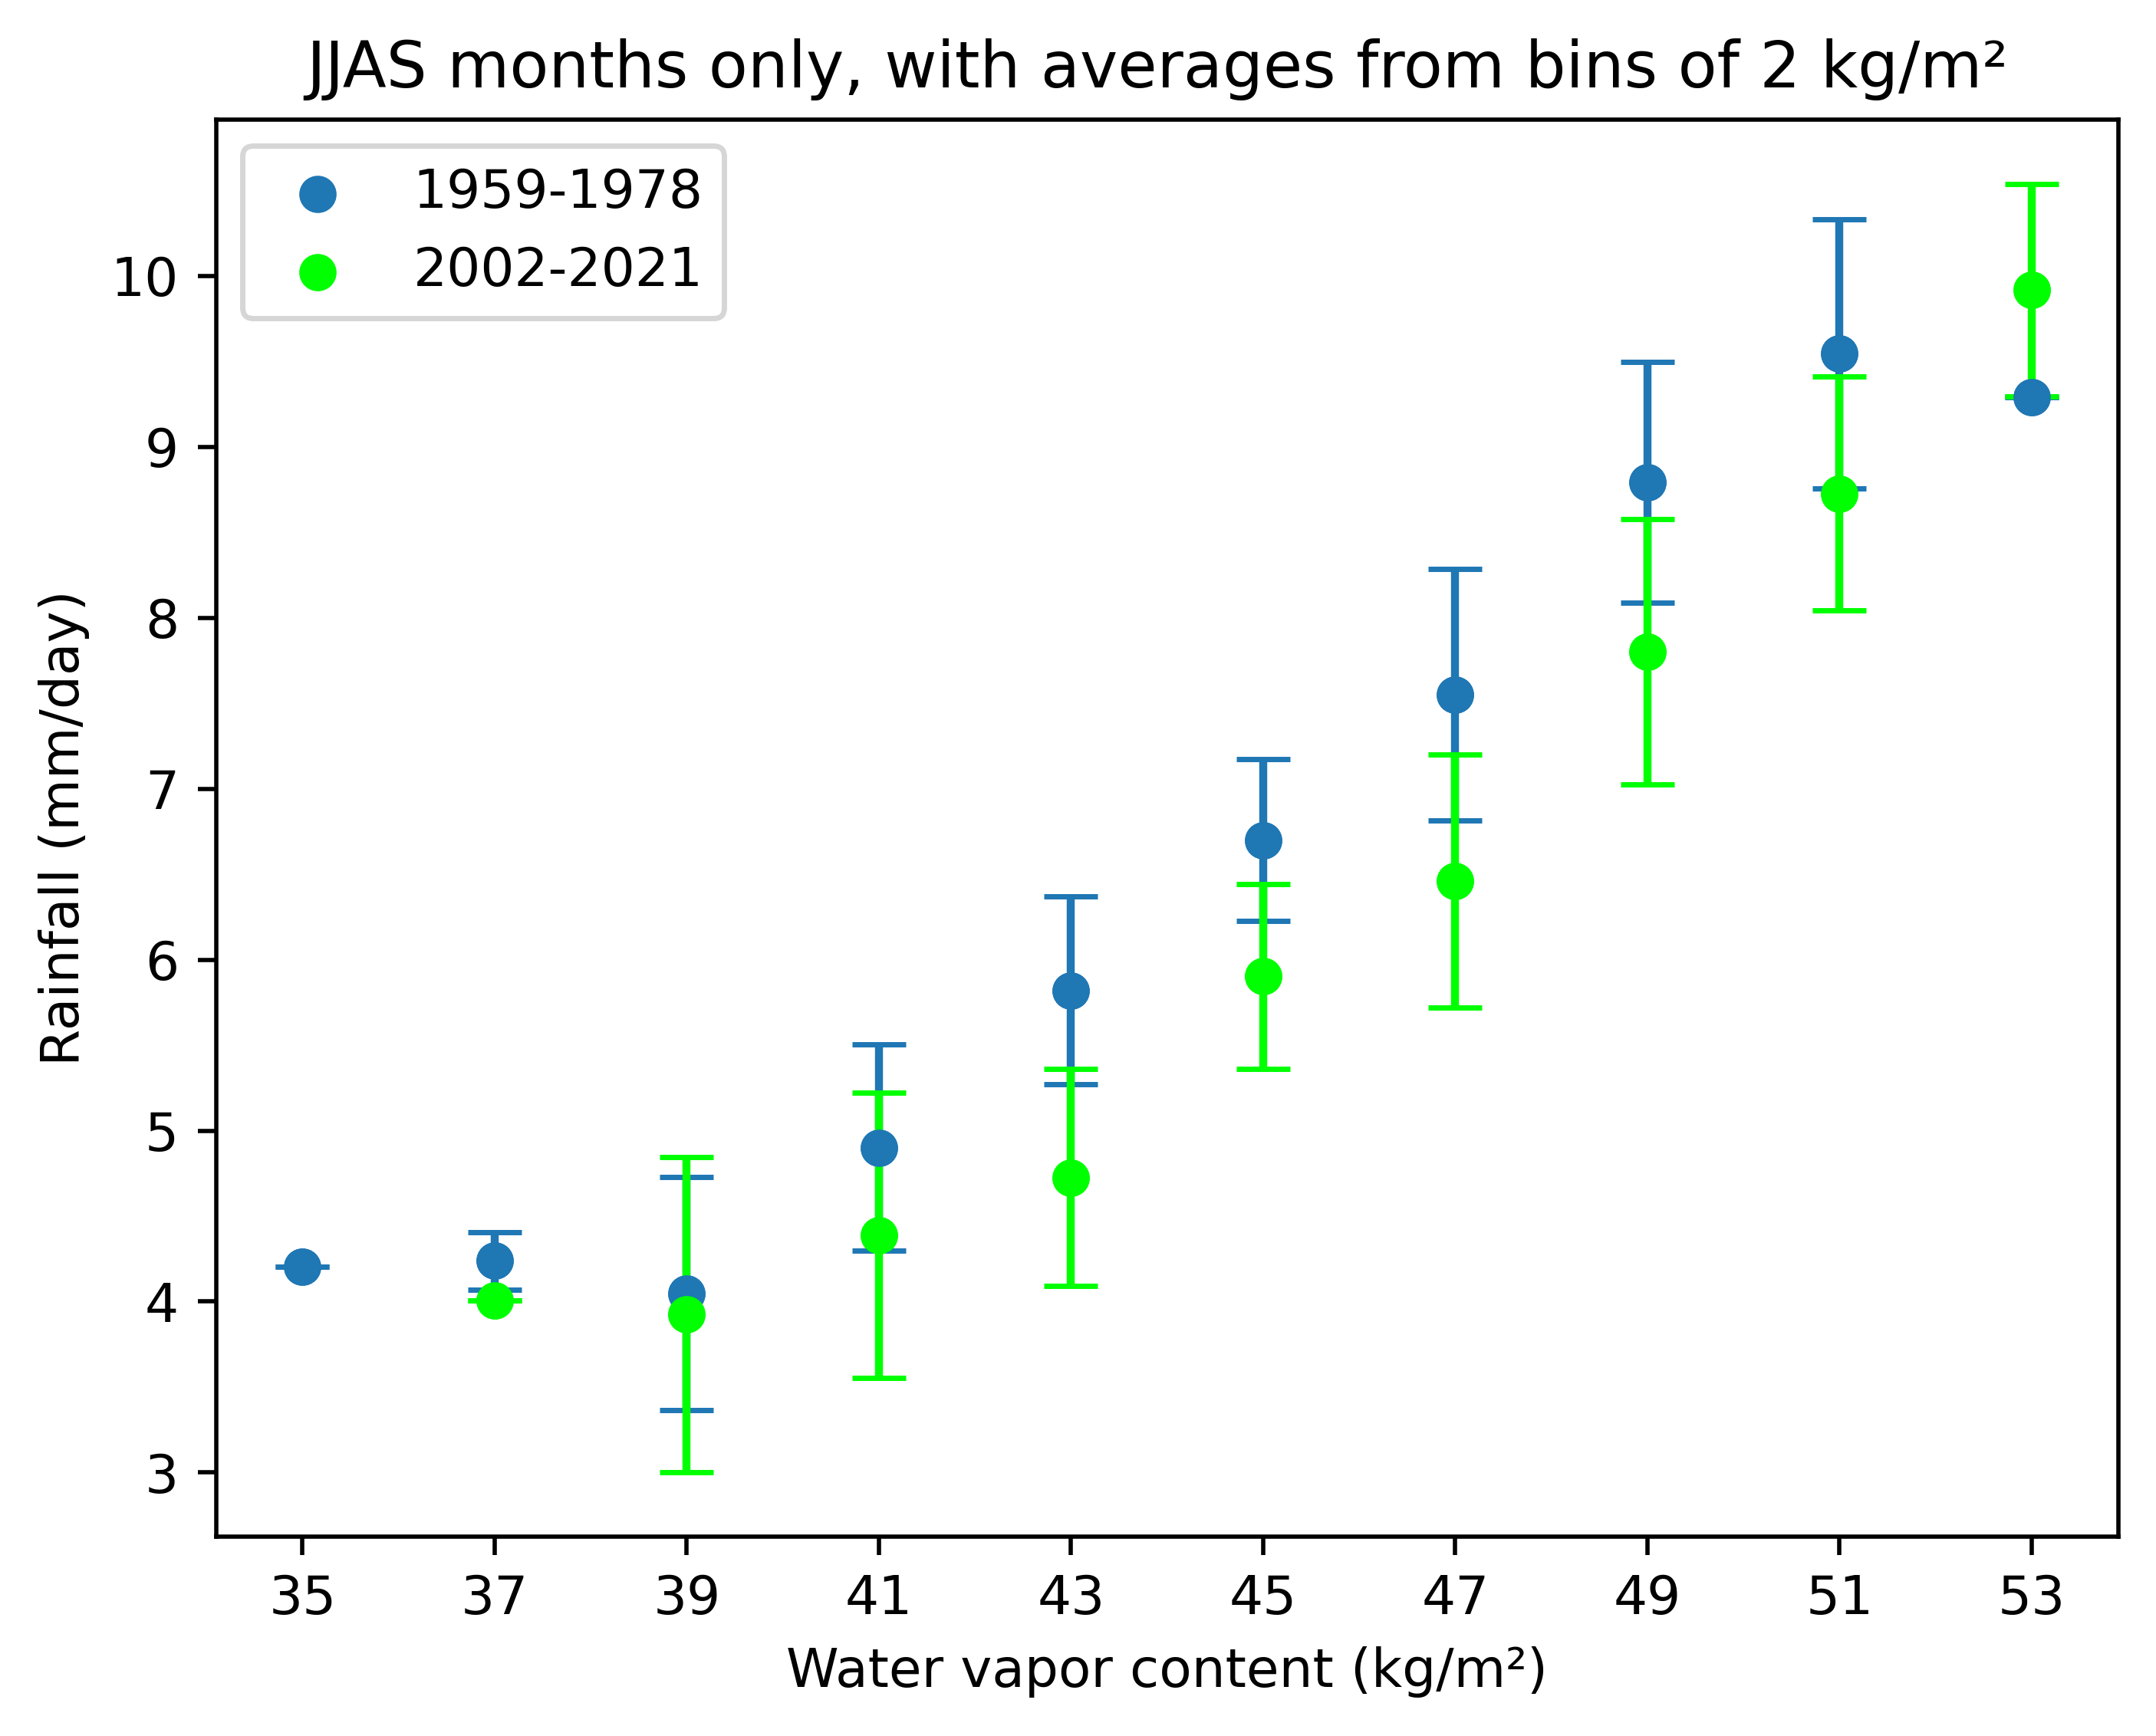

In [8]:
plt.scatter(bins1, res1.values())
plt.scatter(bins2, res2.values(), c='lime')
plt.errorbar(bins1, res1.values(), yerr=std1, fmt="o", capsize=5)
plt.errorbar(bins2, res2.values(), yerr=std2, fmt="o", c='lime', capsize=5)
plt.xticks(bins1, bins1)
plt.xlabel('Water vapor content (kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
plt.title('JJAS months only, with averages from bins of 2 kg/m\u00b2 ')
plt.legend(['1959-1978', '2002-2021'])